<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/main/Segmentation_tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#using_texture_to_segment_images

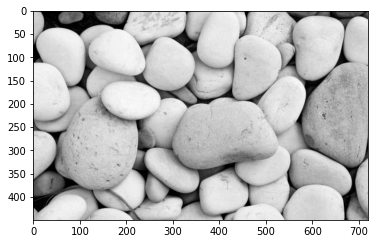

In [17]:
import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2

img = io.imread("/content/drive/MyDrive/rocks.jpg", as_gray=True)
plt.imshow(img, cmap='gray')

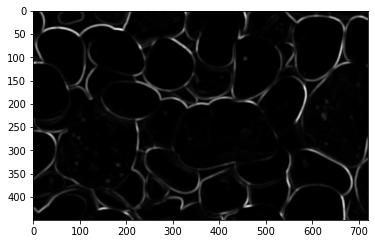

In [3]:
#Variance - not a great way to quantify texture
from scipy import ndimage 
k=7
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

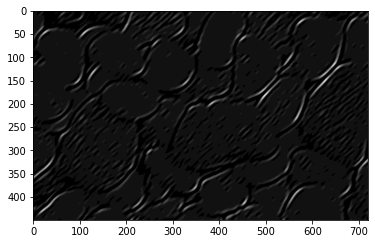

In [4]:
ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


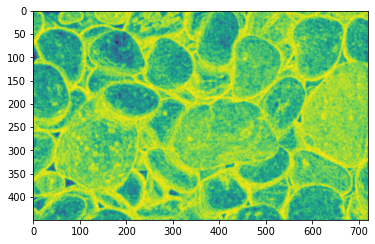

In [5]:
#higher compared to scratch region
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

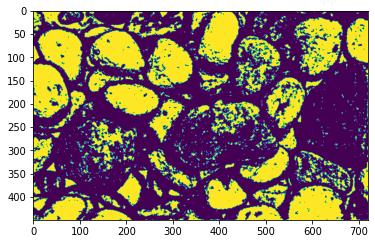

In [7]:
#Now let us binarize the entropy image 
binary = entropy_img <= thresh
plt.imshow(binary)

In [8]:
#Sum all pixels in the scratch region (values =1)
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

Scratched area is:  122008 Square pixels
Scratched area in sq. microns is:  24706.620000000003 Square pixels


#image_segmentation

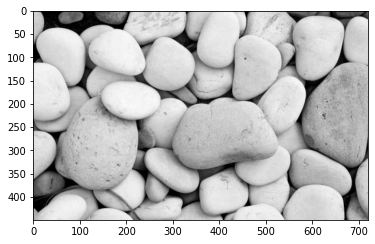

In [9]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np

# The input image.
image = img_as_ubyte(rgb2gray(io.imread("/content/drive/MyDrive/rocks.jpg")))
plt.imshow(image, cmap='gray')
scale = 0.6 #microns/pixel

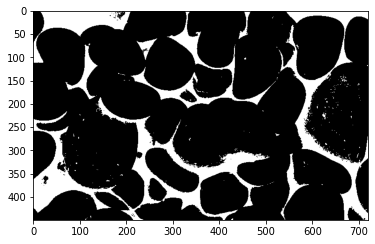

In [21]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)

#Generate thresholded image
thresholded_img = image < threshold
plt.imshow(thresholded_img, cmap='gray')

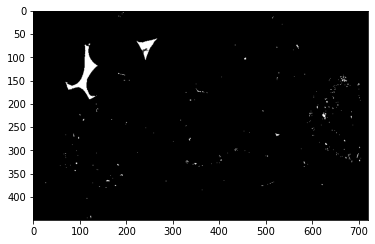

In [32]:
#Remove edge touching regions
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
plt.imshow(edge_touching_removed, cmap='gray')

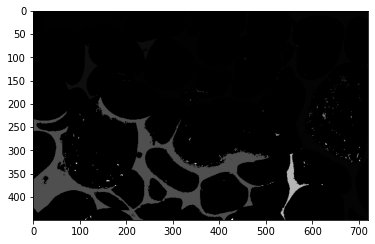

In [29]:
#For 2D image it would be 2

label_image = measure.label(thresholded_img, connectivity=image.ndim)

plt.imshow(label_image, cmap='gray')

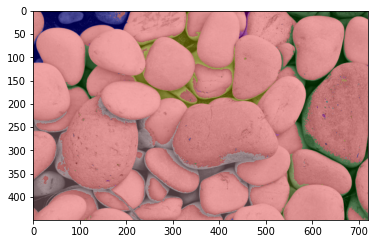

In [30]:
#Return an RGB image where color-coded labels are painted over the image.
#Using label2rgb

image_label_overlay = label2rgb(label_image, image=image)
plt.imshow(image_label_overlay, cmap='gray')